In [4]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
from astropy.table import Column
import pandas as pd
import glob

## Read tables

In [3]:
catalogs = glob.glob(f"data/output/dmu26_XID+MIPS_AKARI_cat*", recursive=True)
cat1=Table.read('data/output/dmu26_XID+MIPS_AKARI_cat_0.fits')

In [4]:
len(catalogs)

20

In [50]:
#catalogs.remove('data/output/dmu26_XID+MIPS_AKARI-NEP_cat40039570.fits')
#catalogs.remove('data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20190227.fits')
#catalogs.remove('data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20190227b.fits')

In [8]:
#catalogs.remove('data/changed_psf/output/dmu26_XID+MIPS_AKARI_cat_0.fits')

In [8]:
cat1.add_column(Column(
    data=np.max([cat1['FErr_MIPS_24_u'] - cat1['F_MIPS_24'],
                 cat1['F_MIPS_24'] - cat1['FErr_MIPS_24_l']],
                axis=0),
    name="ferr_mips_24"))

In [9]:
for c in catalogs:
    cat = Table.read(c)
    cat.add_column(Column(
    data=np.max([cat['FErr_MIPS_24_u'] - cat['F_MIPS_24'],
                 cat['F_MIPS_24'] - cat['FErr_MIPS_24_l']],
                axis=0),
    name="ferr_mips_24"))
    for i,source in enumerate(cat['help_id']):
        if source in cat1['help_id']:
            if cat[i]['ferr_mips_24'] < cat1[[cat1['help_id']==source]]['ferr_mips_24']:
                cat1[[cat1['help_id']==source]] = cat[i]
            else:
                continue
        else:
            cat1.add_row(cat[i])
        

In [10]:
NEP_cat=cat1

In [11]:
NEP_cat.info()

<Table length=36428>
      name        dtype    unit  
---------------- ------- --------
         help_id bytes27         
              RA float64  degrees
             Dec float64  degrees
       F_MIPS_24 float32     muJy
  FErr_MIPS_24_u float32     muJy
  FErr_MIPS_24_l float32     muJy
     Bkg_MIPS_24 float32 MJy / sr
Sig_conf_MIPS_24 float32 MJy / sr
    Rhat_MIPS_24 float32         
   n_eff_MIPS_24 float32         
     Pval_res_24 float32         
    ferr_mips_24 float32         


In [12]:
len(np.unique(NEP_cat['help_id']))

36428

In [40]:
rep =Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20190227b.fits')

In [41]:
df = rep.to_pandas()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36428 entries, 0 to 36427
Data columns (total 12 columns):
help_id             36428 non-null object
RA                  36428 non-null float64
Dec                 36428 non-null float64
F_MIPS_24           36428 non-null float32
FErr_MIPS_24_u      36428 non-null float32
FErr_MIPS_24_l      36428 non-null float32
Bkg_MIPS_24         36428 non-null float32
Sig_conf_MIPS_24    36428 non-null float32
Rhat_MIPS_24        33812 non-null float32
n_eff_MIPS_24       36428 non-null float32
Pval_res_24         36428 non-null float32
flag_mips_24        36428 non-null bool
dtypes: bool(1), float32(8), float64(2), object(1)
memory usage: 2.0+ MB


In [35]:
a= df.loc[df.groupby(['help_id'])['FErr_MIPS_24_u'].idxmin()]

In [26]:
b= df

In [38]:
b.head()

,help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24
0,b'HELP_J180701.864+662041.204',271.757767,66.344779,90.635460,241.979843,22.712053,3.140659,0.000005,0.999073,2000.0,0.513,True
1,b'HELP_J175704.238+661840.010',269.267657,66.311114,49.712151,128.798569,12.516103,2.981551,0.000005,NaN,2000.0,0.023,False
2,b'HELP_J175711.539+661917.722',269.298078,66.321589,25.949755,52.407436,8.082660,2.981551,0.000005,0.999333,2000.0,0.000,True
3,b'HELP_J175708.522+661904.863',269.285510,66.318018,31.772854,68.475685,8.703482,2.981551,0.000005,1.000575,2000.0,0.142,False
4,b'HELP_J175648.306+661921.139',269.201273,66.322539,38.599758,96.733185,10.378979,2.967166,0.000005,1.002864,1531.0,0.001,False


In [27]:
b = b.iloc[:100, :]

In [29]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
help_id             100 non-null object
RA                  100 non-null float64
Dec                 100 non-null float64
F_MIPS_24           100 non-null float32
FErr_MIPS_24_u      100 non-null float32
FErr_MIPS_24_l      100 non-null float32
Bkg_MIPS_24         100 non-null float32
Sig_conf_MIPS_24    100 non-null float32
Rhat_MIPS_24        75 non-null float32
n_eff_MIPS_24       100 non-null float32
Pval_res_24         100 non-null float32
flag_mips_24        100 non-null bool
dtypes: bool(1), float32(8), float64(2), object(1)
memory usage: 5.6+ KB


In [31]:
c = df.iloc[:100,:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
help_id             100 non-null object
RA                  100 non-null float64
Dec                 100 non-null float64
F_MIPS_24           100 non-null float32
FErr_MIPS_24_u      100 non-null float32
FErr_MIPS_24_l      100 non-null float32
Bkg_MIPS_24         100 non-null float32
Sig_conf_MIPS_24    100 non-null float32
Rhat_MIPS_24        75 non-null float32
n_eff_MIPS_24       100 non-null float32
Pval_res_24         100 non-null float32
flag_mips_24        100 non-null bool
dtypes: bool(1), float32(8), float64(2), object(1)
memory usage: 5.6+ KB


In [16]:
a = a.set_index('help_id')
a.head()

,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24
help_id,,,,,,,,,,,
b'HELP_J174958.317+661836.745',267.492987,66.310207,402.171600,997.544128,99.626717,2.611250,0.000005,0.998408,2000.0,0.790,True
b'HELP_J174958.976+661841.815',267.495734,66.311615,336.591766,861.854248,90.578865,2.611250,0.000005,0.999011,2000.0,0.806,True
b'HELP_J174959.565+661835.133',267.498189,66.309759,914.506531,1464.095703,391.050873,2.611250,0.000005,0.999980,2000.0,0.027,False
b'HELP_J175001.532+661913.701',267.506383,66.320473,1180.732422,1794.802124,603.101196,2.639626,0.000005,0.999901,2000.0,0.000,False
b'HELP_J175001.906+661938.012',267.507944,66.327226,649.953857,1258.510376,192.406998,2.639626,0.000005,0.999473,2000.0,0.011,False


In [36]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31959 entries, 14659 to 1602
Data columns (total 12 columns):
help_id             31959 non-null object
RA                  31959 non-null float64
Dec                 31959 non-null float64
F_MIPS_24           31959 non-null float32
FErr_MIPS_24_u      31959 non-null float32
FErr_MIPS_24_l      31959 non-null float32
Bkg_MIPS_24         31959 non-null float32
Sig_conf_MIPS_24    31959 non-null float32
Rhat_MIPS_24        30029 non-null float32
n_eff_MIPS_24       31959 non-null float32
Pval_res_24         31959 non-null float32
flag_mips_24        31959 non-null bool
dtypes: bool(1), float32(8), float64(2), object(1)
memory usage: 2.0+ MB


In [45]:
len(np.unique(a['help_id']))

31959

In [46]:
36859 - 36428

32416

In [2]:
NEP_cat =Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20190227.fits')

In [11]:
ls ../../

data/   dmu12/  dmu17/  dmu22/  dmu26/  dmu4/  dmu9/       TEMPLATES/
dmu0/   dmu13/  dmu18/  dmu23/  dmu28/  dmu5/  LICENSE
dmu1/   dmu14/  dmu19/  dmu24/  dmu31/  dmu6/  meta/
dmu10/  dmu16/  dmu2/   dmu25/  dmu32/  dmu8/  readme.md*


## Look at Symmetry of PDFs to determine depth level of catalogue

2.7453837


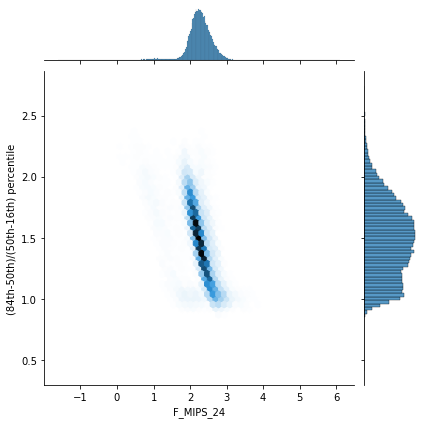

In [12]:
import seaborn as sns
skew=(NEP_cat['FErr_MIPS_24_u']-NEP_cat['F_MIPS_24'])/(NEP_cat['F_MIPS_24']-NEP_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(NEP_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))
g.savefig('../../data/figs/sk_MIPS_AKARI-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_AKARI-NEP.png', bbox='tight')

Both seem to have flux pdfs that become Gaussian at ~30$\mathrm{\mu Jy}$ 

In [14]:
10**1.5

31.622776601683793

## Add flag to catalogue

In [16]:
from astropy.table import Column
NEP_cat.add_column(Column(np.zeros(len(NEP_cat), dtype=bool),name='flag_mips_24'))


In [17]:
ind_NEP=(NEP_cat['Pval_res_24']>0.5) | (NEP_cat['F_MIPS_24'] < 30.0)

In [18]:
NEP_cat['flag_mips_24'][ind_NEP]=True


In [19]:
NEP_cat.write('./data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20191010.fits', format='fits',overwrite=True)

### Check Map


In [20]:
from astropy.io import fits
import pylab as plt

In [21]:
MIPS_pval=fits.open('./data/Pval/dmu26_XID+MIPS_AKARI-NEP_Bayes_Pval2.fits')


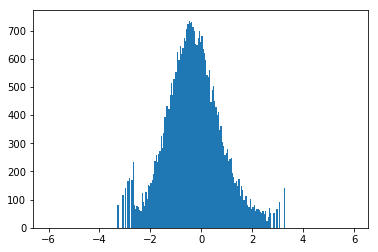

In [22]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

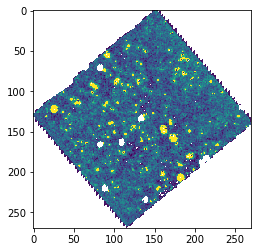

In [23]:
plt.imshow(MIPS_pval[1].data)

### Output Analysis


In [1]:
import pylab as plt
%matplotlib inline


import numpy as np
import xidplus
from xidplus import moc_routines
output_folder='./data/'

In [64]:
# Original map

priors,posterior=xidplus.load('./data/im19/Tile_10485725_11.pkl')

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


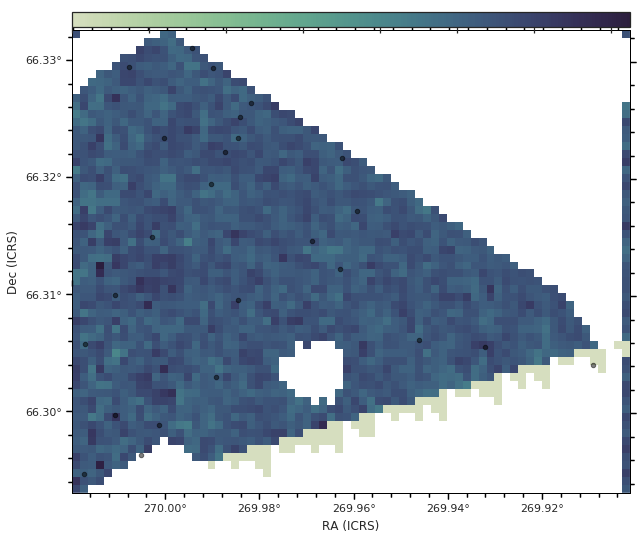

In [65]:
figs,fig=xidplus.plot_map(priors)


In [66]:
xidplus.replicated_map_movie(priors,posterior,50)


keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


In [67]:
posterior.samples['src_f'].shape

(2000, 1, 29)

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -3.298e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.661e+00 [aplpy.core]


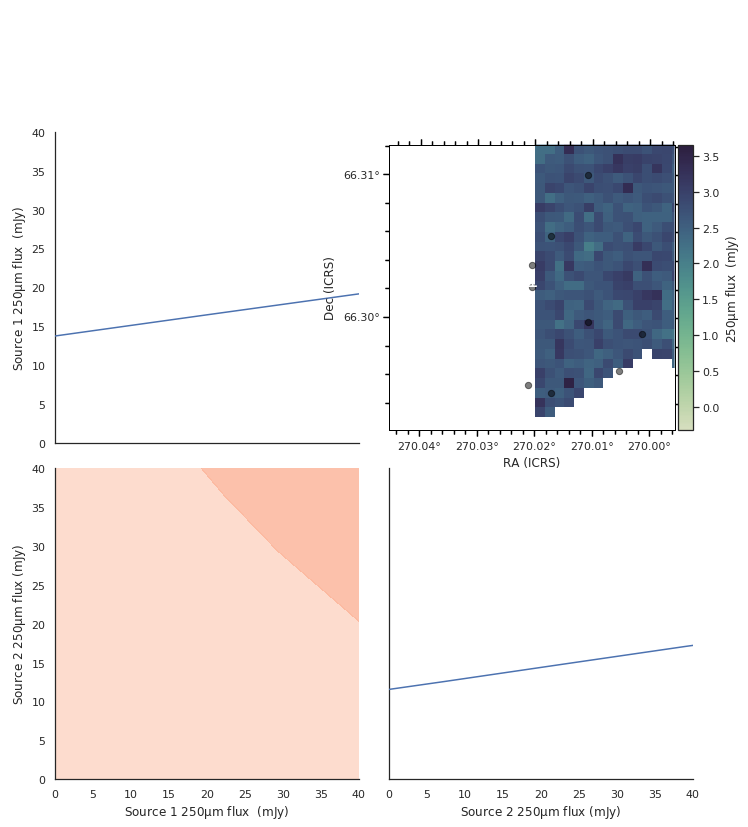

In [68]:
import aplpy
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
sns.set_style("white")
import xidplus.posterior_maps as postmaps


#Select source you want to plot joint distribution
s1=8
s2=9

labels=[r'Source 1 $250\mathrm{\mu m}$ flux  (mJy)',r'Source 2 $250\mathrm{\mu m}$ flux (mJy)']
df = pd.DataFrame(posterior.samples['src_f'][:,0,[s1,s2]],columns=labels)
g = sns.PairGrid(df,size=5)
g.map_diag(sns.kdeplot,c='Red')
g.map_lower(sns.kdeplot, cmap="Reds",alpha=0.8,n_levels=10,normed=True, shade=True,shade_lowest=False)
g.set(ylim=(0,40))
g.set(xlim=(0,40))

g.axes[0,1].spines['bottom'].set_color('white')
g.axes[0,1].spines['left'].set_color('white')
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

real_250 = aplpy.FITSFigure(postmaps.make_fits_image(priors[0],priors[0].sim)[1],figure=g.fig,subplot=(2,2,2))
real_250.show_colorscale(cmap=cmap)

real_250.show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=40, alpha=0.5)
real_250.recenter(priors[0].sra[s1], priors[0].sdec[s1], radius=0.01)

real_250.add_label(priors[0].sra[s1], priors[0].sdec[s1]+0.0005, 1, relative=False,size=20,color='white')
real_250.add_label(priors[0].sra[s2], priors[0].sdec[s2]-0.0010, 2, relative=False,size=20,color='white')
real_250.tick_labels.set_xformat('dd.dd')
real_250.tick_labels.set_yformat('dd.dd')


real_250.add_colorbar(axis_label_text=r'$250\mathrm{\mu m}$ flux  (mJy)')

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


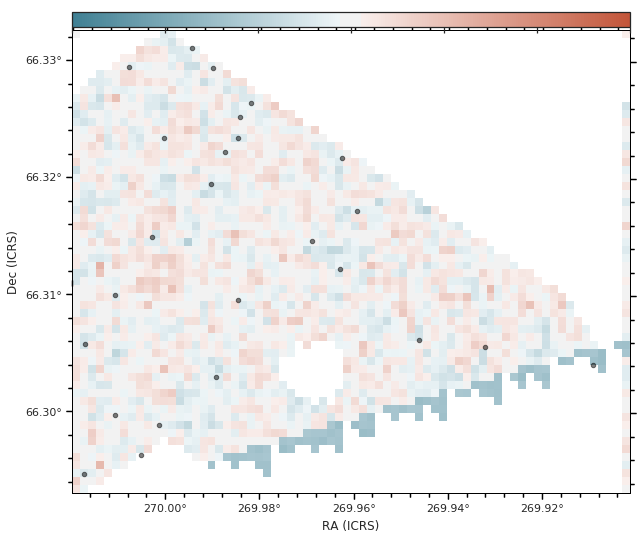

In [69]:
figs, fig=xidplus.plot_Bayes_pval_map(priors, posterior)


In [61]:
from astropy.io import fits
import matplotlib.pyplot as plt
Bayes_Pval=fits.open('./data/im19/Tile_10485725_11_MIPS_24_Bayes_Pval.fits')

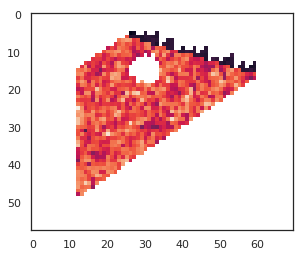

In [62]:
plt.imshow(Bayes_Pval[1].data)